In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# import dataset

In [183]:
data = pd.read_csv('2020_al.csv')

In [184]:
data.shape

(337553, 19)

In [185]:
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          337553 non-null  int64 
 1   stream         337553 non-null  object
 2   Zscore         337553 non-null  object
 3   district_rank  337553 non-null  object
 4   island_rank    337553 non-null  object
 5   al_year        337553 non-null  int64 
 6   sub1           337553 non-null  object
 7   sub1_r         337553 non-null  object
 8   sub2           337553 non-null  object
 9   sub2_r         337553 non-null  object
 10  sub3           337553 non-null  object
 11  sub3_r         337553 non-null  object
 12  cgt_r          337553 non-null  object
 13  ge_r           337553 non-null  object
 14  syllabus       337553 non-null  object
 15  birth_day      337553 non-null  object
 16  birth_month    337553 non-null  object
 17  birth_year     337553 non-null  object
 18  gend

In [187]:
data.isnull().sum()

index               0
stream              0
Zscore              0
district_rank       0
island_rank         0
al_year             0
sub1                0
sub1_r              0
sub2                0
sub2_r              0
sub3                0
sub3_r              0
cgt_r               0
ge_r                0
syllabus            0
birth_day           0
birth_month         0
birth_year          0
gender           1484
dtype: int64

In [188]:
data['gender'].fillna('Unknown', inplace=True)

In [189]:
data.isnull().sum()

index            0
stream           0
Zscore           0
district_rank    0
island_rank      0
al_year          0
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
cgt_r            0
ge_r             0
syllabus         0
birth_day        0
birth_month      0
birth_year       0
gender           0
dtype: int64

In [190]:
data['gender'].unique()

array(['female', 'male', 'Unknown', 'Major error'], dtype=object)

In [191]:
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [192]:
data= data.drop(columns=['index', 'al_year', 'birth_day', 'birth_month', 'birth_year','island_rank', 'district_rank', 'cgt_r', 'ge_r' ])

In [193]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,ARTS,-.3550,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,new,female
1,ARTS,-.2648,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,new,female
2,COMMERCE,-.4760,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,new,female
3,COMMERCE,-.1012,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,new,female
4,COMMERCE,.6014,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,new,female


In [194]:
data.shape

(337553, 10)

In [195]:
cols = ['stream', 'sub1', 'sub1_r', 'sub2', 'sub2_r', 'sub3', 'sub3_r', 'syllabus', 'gender']

label_encoders = {col: LabelEncoder() for col in cols}

for col in cols:
    data[col] = label_encoders[col].fit_transform(data[col])

In [196]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-.3550,47,5,20,3,58,6,0,2
1,1,-.2648,47,5,12,3,58,4,0,2
2,4,-.4760,21,5,11,5,0,6,0,2
3,4,-.1012,21,3,11,3,0,6,0,2
4,4,.6014,21,3,11,3,0,3,0,2


In [197]:
data["Zscore"] = pd.to_numeric(data['Zscore'], errors='coerce') #coerce will introduce null values for non numeric data in the columns

In [198]:
data.isnull().sum()

stream           0
Zscore      105249
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
syllabus         0
gender           0
dtype: int64

# Anslysis

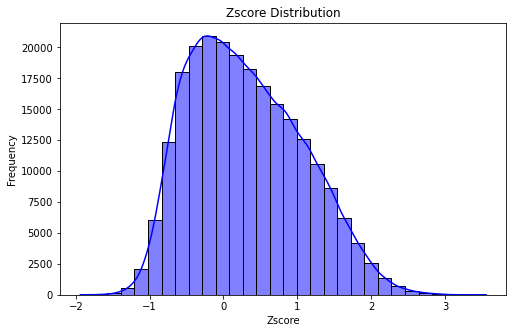

In [199]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Zscore'], kde=True, bins=30, color='blue')
plt.title('Zscore Distribution')
plt.xlabel('Zscore')
plt.ylabel('Frequency')
plt.show()

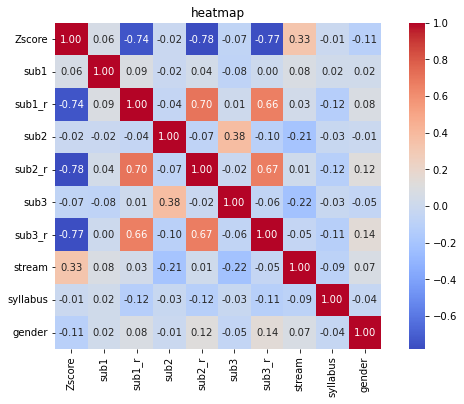

In [200]:
plt.figure(figsize=(10, 6))
m_data = data[['Zscore','sub1', 'sub1_r', 'sub2', 'sub2_r', 'sub3', 'sub3_r', 'stream','syllabus', 'gender']]
sns.heatmap(m_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('heatmap')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '7'),
  Text(5, 0, '5'),
  Text(6, 0, '3'),
  Text(7, 0, '6')])

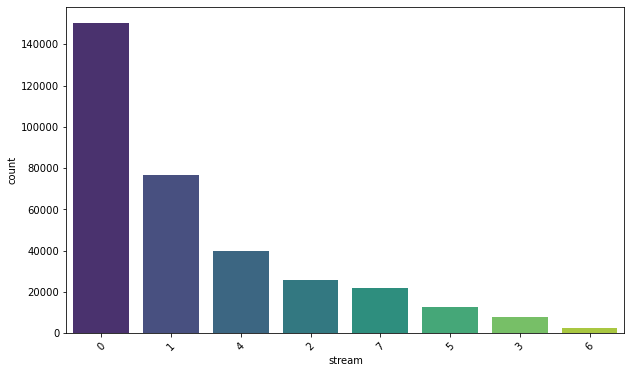

In [201]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)
plt.xticks(rotation=45)

In [202]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-0.3550,47,5,20,3,58,6,0,2
1,1,-0.2648,47,5,12,3,58,4,0,2
2,4,-0.4760,21,5,11,5,0,6,0,2
3,4,-0.1012,21,3,11,3,0,6,0,2
4,4,0.6014,21,3,11,3,0,3,0,2


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stream    337553 non-null  int32  
 1   Zscore    232304 non-null  float64
 2   sub1      337553 non-null  int32  
 3   sub1_r    337553 non-null  int32  
 4   sub2      337553 non-null  int32  
 5   sub2_r    337553 non-null  int32  
 6   sub3      337553 non-null  int32  
 7   sub3_r    337553 non-null  int32  
 8   syllabus  337553 non-null  int32  
 9   gender    337553 non-null  int32  
dtypes: float64(1), int32(9)
memory usage: 14.2 MB


In [204]:
data['Zscore'].fillna(data['Zscore'].mean(), inplace=True)

In [205]:
x = data.drop(columns=['Zscore'])
y = data['Zscore']

In [206]:
x.head()

,stream,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,47,5,20,3,58,6,0,2
1,1,47,5,12,3,58,4,0,2
2,4,21,5,11,5,0,6,0,2
3,4,21,3,11,3,0,6,0,2
4,4,21,3,11,3,0,3,0,2


In [207]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   stream    337553 non-null  int32
 1   sub1      337553 non-null  int32
 2   sub1_r    337553 non-null  int32
 3   sub2      337553 non-null  int32
 4   sub2_r    337553 non-null  int32
 5   sub3      337553 non-null  int32
 6   sub3_r    337553 non-null  int32
 7   syllabus  337553 non-null  int32
 8   gender    337553 non-null  int32
dtypes: int32(9)
memory usage: 11.6 MB


In [208]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 337553 entries, 0 to 337552
Series name: Zscore
Non-Null Count   Dtype  
--------------   -----  
337553 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [210]:
x.shape, y.shape

((337553, 9), (337553,))

In [211]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((236287, 9), (236287,), (101266, 9), (101266,))

In [212]:
model = LinearRegression()

In [213]:
model.fit(x_train, y_train)

LinearRegression()

In [214]:
acc1 = model.score(x_train, y_train)
acc2 = model.score(x_test, y_test)
print(f"Training Accuracy: {acc1:.2f}")
print(f"Testing Accuracy: {acc2:.2f}")

Training Accuracy: 0.60
Testing Accuracy: 0.61


In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
scaler = StandardScaler()

In [217]:
x_train_scaled = scaler.fit_transform(x_train) #fit_transform is used to scale the training data
x_test_scaled = scaler.transform(x_test) #transform is used to scale the testing data

In [218]:
yhat = model.predict(x_test_scaled)
yhat

c:\Users\Ishan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.04316496, 1.66106449, 1.0129492 , ..., 1.99334239, 1.28858704,
       1.1062999 ])

In [219]:
r2_score(y_test, yhat)

-1.9197309978563344

In [220]:
model2 = LinearRegression()

In [221]:
model2.fit(x_train_scaled, y_train)

LinearRegression()

In [222]:
acc3 = model2.score(x_train_scaled, y_train)
acc4 = model2.score(x_test_scaled, y_test)

print(f"Training Accuracy: {acc3:.2f}")
print(f"Testing Accuracy: {acc4:.2f}")

Training Accuracy: 0.60
Testing Accuracy: 0.61


In [232]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [233]:
poly_x_train = poly_features.fit_transform(x_train_scaled)

In [234]:
poly_features.get_feature_names()

c:\Users\Ishan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x7^2',
 'x7 x8',
 'x8^2']

In [235]:
model = LinearRegression()
model.fit(poly_x_train, y_train)

LinearRegression()

In [236]:
poly_x_test = poly_features.fit_transform(x_test_scaled)

In [237]:
acc0 = model.score(poly_x_train, y_train)
acc9 = model.score(poly_x_test, y_test)

print(f"Training Accuracy: {acc0:.2f}")
print(f"Testing Accuracy: {acc9:.2f}")

Training Accuracy: 0.74
Testing Accuracy: 0.74


In [238]:
import pickle 
# Save the trained model as a pickle string.
with open('model.pkl', 'wb') as model_pkl:
    pickle.dump(model2, model_pkl)

In [239]:
{label: code for label, code in zip(label_encoders['sub1'].classes_, range(len(label_encoders['sub1'].classes_)))}

{'ACCOUNTING': 0,
 'AGRICULTURAL SCIENCE': 1,
 'AGRO TECHNOLOGY': 2,
 'ART': 3,
 'BIO SYSTEMS TECHNOLOGY': 4,
 'BIO-RESOURCE TECHNOLOGY': 5,
 'BIOLOGY': 6,
 'BUDDHISM': 7,
 'BUDDHIST CIVILIZATION': 8,
 'BUSINESS STATISTICS': 9,
 'BUSINESS STUDIES': 10,
 'CARNATIC MUSIC': 11,
 'CHEMISTRY': 12,
 'CHRISTIAN CIVILIZATION': 13,
 'CHRISTIANITY': 14,
 'CIVIL TECHNOLOGY': 15,
 'COMBINED MATHEMATICS': 16,
 'COMMUNICATION & MEDIA STUDIES': 17,
 'DANCING(BHARATHA)': 18,
 'DANCING(INDIGENOUS)': 19,
 'DRAMA AND THEATRE (SINHALA)': 20,
 'ECONOMICS': 21,
 'ELECTRICAL,ELECTRONIC AND IT': 22,
 'ENGINEERING TECHNOLOGY': 23,
 'ENGLISH': 24,
 'FOOD TECHNOLOGY': 25,
 'GEOGRAPHY': 26,
 'GREEK & ROMAN CIVILIZATION': 27,
 'HIGHER MATHEMATICS': 28,
 'HINDU CIVILIZATION': 29,
 'HINDUISM': 30,
 'HISTORY OF EUROPE': 31,
 'HISTORY OF INDIA': 32,
 'HISTORY OF MODERN WORLD': 33,
 'HISTORY OF SRI LANKA & EUROPE': 34,
 'HISTORY OF SRI LANKA & INDIA': 35,
 'HISTORY OF SRI LANKA & MODERN WORLD': 36,
 'HOME ECONOMICS': 3

In [241]:
x.head(
)

,stream,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,47,5,20,3,58,6,0,2
1,1,47,5,12,3,58,4,0,2
2,4,21,5,11,5,0,6,0,2
3,4,21,3,11,3,0,6,0,2
4,4,21,3,11,3,0,3,0,2


In [242]:
{label: code for label, code in zip(label_encoders['stream'].classes_, range(len(label_encoders['stream'].classes_)))}

{'-': 0,
 'ARTS': 1,
 'BIOLOGICAL SCIENCE': 2,
 'BIOSYSTEMS TECHNOLOGY': 3,
 'COMMERCE': 4,
 'ENGINEERING TECHNOLOGY': 5,
 'NON': 6,
 'PHYSICAL SCIENCE': 7}

In [243]:
{label: code for label, code in zip(label_encoders['syllabus'].classes_, range(len(label_encoders['syllabus'].classes_)))}

{'new': 0, 'old': 1}

In [244]:
{label: code for label, code in zip(label_encoders['gender'].classes_, range(len(label_encoders['gender'].classes_)))}

{'Major error': 0, 'Unknown': 1, 'female': 2, 'male': 3}

In [245]:
{label: code for label, code in zip(label_encoders['sub1_r'].classes_, range(len(label_encoders['sub1_r'].classes_)))}

{'A': 0, 'Absent': 1, 'B': 2, 'C': 3, 'F': 4, 'S': 5, 'Withheld': 6}

In [246]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-0.3550,47,5,20,3,58,6,0,2
1,1,-0.2648,47,5,12,3,58,4,0,2
2,4,-0.4760,21,5,11,5,0,6,0,2
3,4,-0.1012,21,3,11,3,0,6,0,2
4,4,0.6014,21,3,11,3,0,3,0,2
